Congrats! You just graduated UVA's BSDS program and got a job working at a movie studio in Hollywood. 

Your boss is the head of the studio and wants to know if they can gain a competitive advantage by predicting new movies that might get high imdb scores (movie rating). 

You would like to be able to explain the model to mere mortals but need a fairly robust and flexible approach so you've chosen to use decision trees to get started. 

In doing so, similar to  great data scientists of the past you remembered the excellent education provided to you at UVA in a undergrad data science course and have outline 20ish steps that will need to be undertaken to complete this task. As always, you will need to make sure to #comment your work heavily. 

 Footnotes: 
-	You can add or combine steps if needed
-	Also, remember to try several methods during evaluation and always be mindful of how the model will be used in practice.
- Make sure all your variables are the correct type (factor, character,numeric, etc.)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#1. Load the data
#Sometimes need to set the working directory back out of a folder that we create a file in

#import os
#os.listdir()
#print(os.getcwd())
#os.chdir('c:\\Users\\Brian Wright\\Documents\\3001Python\\DS-3001')

movie_metadata=pd.read_csv("data/movie_metadata.csv")



#2 Ensure all the variables are classified correctly including the target variable and collapse factor variables as needed.

In [3]:
print(movie_metadata.head())
print(movie_metadata.info())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [4]:
#to collapse genres let's just split on the '|' character and take the first one
movie_metadata['genres'] = movie_metadata['genres'].str.split('|').str[0]
print(movie_metadata.genres.value_counts())

genres
Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
Film-Noir         1
History           1
Name: count, dtype: int64


In [5]:
cat = movie_metadata.select_dtypes(include=['object'])
movie_metadata[cat.columns] = cat.astype('category')
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      5024 non-null   category
 1   director_name              4939 non-null   category
 2   num_critic_for_reviews     4993 non-null   float64 
 3   duration                   5028 non-null   float64 
 4   director_facebook_likes    4939 non-null   float64 
 5   actor_3_facebook_likes     5020 non-null   float64 
 6   actor_2_name               5030 non-null   category
 7   actor_1_facebook_likes     5036 non-null   float64 
 8   gross                      4159 non-null   float64 
 9   genres                     5043 non-null   category
 10  actor_1_name               5036 non-null   category
 11  movie_title                5043 non-null   category
 12  num_voted_users            5043 non-null   int64   
 13  cast_total_facebook_likes  5043 n

In [6]:
print(movie_metadata.genres.value_counts())

genres
Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Music             1
History           1
Game-Show         1
Film-Noir         1
Name: count, dtype: int64


In [7]:
#might be hard to tell what's what now but let's drop film title and some text info because i don't think it contributes to how the film is reviewed and it'd be meaningless to have that many categories
old_movie_metadata = movie_metadata.copy() #maintaining a copy of the original data for the last section (printing top film names)
movie_metadata.drop('movie_title', axis=1, inplace=True)
movie_metadata.drop('movie_imdb_link', axis=1, inplace=True)
#let's just consider the two leading roles for now
movie_metadata.drop('actor_3_name', axis=1, inplace=True)

In [8]:
bins = [0, 7, 10]
labels = ['Not Good', 'Good']

# create a new categorical variable based on "imdb_score"
movie_metadata['imdb_score_cat'] = pd.cut(movie_metadata['imdb_score'], bins=bins, labels=labels)
print(movie_metadata['imdb_score_cat'].value_counts())

imdb_score_cat
Not Good    3449
Good        1594
Name: count, dtype: int64


In [9]:
#satisfied with this
print(movie_metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      5024 non-null   category
 1   director_name              4939 non-null   category
 2   num_critic_for_reviews     4993 non-null   float64 
 3   duration                   5028 non-null   float64 
 4   director_facebook_likes    4939 non-null   float64 
 5   actor_3_facebook_likes     5020 non-null   float64 
 6   actor_2_name               5030 non-null   category
 7   actor_1_facebook_likes     5036 non-null   float64 
 8   gross                      4159 non-null   float64 
 9   genres                     5043 non-null   category
 10  actor_1_name               5036 non-null   category
 11  num_voted_users            5043 non-null   int64   
 12  cast_total_facebook_likes  5043 non-null   int64   
 13  facenumber_in_poster       5030 n

#3 Check for missing variables and correct as needed.

/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Git

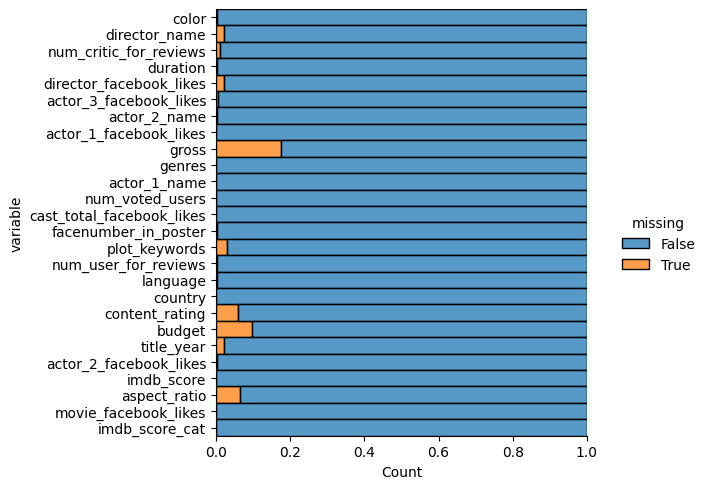

In [10]:
import seaborn as sns

sns.displot(
    data=movie_metadata.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [11]:
print(movie_metadata.isna().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_score_cat                 0
dtype: int64


In [12]:
#Let's just drop them, budget and gross seem like they would be really revealing so we don't want to impute them
movie_metadata = movie_metadata.dropna()
old_movie_metadata = old_movie_metadata.dropna()

In [13]:
print(movie_metadata.info())
#lost a good portion of the data but should be enough still

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      3755 non-null   category
 1   director_name              3755 non-null   category
 2   num_critic_for_reviews     3755 non-null   float64 
 3   duration                   3755 non-null   float64 
 4   director_facebook_likes    3755 non-null   float64 
 5   actor_3_facebook_likes     3755 non-null   float64 
 6   actor_2_name               3755 non-null   category
 7   actor_1_facebook_likes     3755 non-null   float64 
 8   gross                      3755 non-null   float64 
 9   genres                     3755 non-null   category
 10  actor_1_name               3755 non-null   category
 11  num_voted_users            3755 non-null   int64   
 12  cast_total_facebook_likes  3755 non-null   int64   
 13  facenumber_in_poster       3755 non-nu

#4 Guess what, you don't need to scale the data, because DTs don't require this to be done, they make local greedy decisions...keeps getting easier, go to the next step.

sweet

#5 Determine the baserate or prevalence for the classifier, what does this number mean?

In [14]:
print(movie_metadata.imdb_score_cat.value_counts())

imdb_score_cat
Not Good    2610
Good        1145
Name: count, dtype: int64


In [15]:
#check the prevalence
print('prevalence = ' + str(1145/(1145+2610))) #of good

prevalence = 0.30492676431424764


about 30.5% of the movies would be considered good (imdb_score > 7.5)

#6 Split your data into test, tune, and train. (80/10/10)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = movie_metadata.select_dtypes(include=['category']).columns

encoder = OrdinalEncoder()
for column in categorical_columns:
    movie_metadata[[column]] = encoder.fit_transform(movie_metadata[[column]])

In [17]:
movie_metadata = movie_metadata.drop(columns='imdb_score')
X = movie_metadata.drop(columns='imdb_score_cat')
y = movie_metadata.imdb_score_cat


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify= y, random_state=21)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,stratify= y_test, random_state=49)

#7 Create the kfold object for cross validation.

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=10,n_repeats =5, random_state=21)

#8 Create the scoring metric you will use to evaluate your model and the max depth hyperparameter 

In [20]:
scoring = ['roc_auc','recall','balanced_accuracy']
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11]}

#9 Build the classifier object 

In [21]:
from sklearn.tree import DecisionTreeClassifier
cl= DecisionTreeClassifier(random_state=1000)

#10 Use the kfold object and the scoring metric to find the best hyperparameter value for max depth via the grid search method.

In [22]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(cl, param, scoring=scoring, n_jobs=-1, cv=kf,refit='roc_auc')

#11 Fit the model to the training data.

In [23]:
model = search.fit(X_train, y_train)

#12 What is the best depth value?

In [27]:
best = model.best_estimator_
print(best) 

DecisionTreeClassifier(max_depth=5, random_state=1000)


Depth of 5

#13 Print out the model

In [28]:
print(model.cv_results_)
print(model.cv_results_.keys())

{'mean_fit_time': array([0.01461955, 0.02295862, 0.03367776, 0.04573847, 0.05273181,
       0.06559817, 0.07162112, 0.08084733, 0.08983713, 0.09705142,
       0.09717443]), 'std_fit_time': array([0.00501015, 0.00451389, 0.0060433 , 0.00738826, 0.00736122,
       0.00893035, 0.00640177, 0.00597627, 0.0074646 , 0.00723547,
       0.0144038 ]), 'mean_score_time': array([0.01622419, 0.01471261, 0.01417617, 0.01240101, 0.01342402,
       0.01244406, 0.01235369, 0.01038919, 0.01213024, 0.01205947,
       0.01066033]), 'std_score_time': array([0.0062192 , 0.00467655, 0.00487736, 0.00564159, 0.00663999,
       0.00510776, 0.00440017, 0.00402675, 0.00423265, 0.0042793 ,
       0.00448362]), 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'ma

#14 View the results, comment on how the model performed using several evaluation metrics.

In [29]:
auc = model.cv_results_['mean_test_roc_auc']
recall= model.cv_results_['mean_test_recall']
bal_acc= model.cv_results_['mean_test_balanced_accuracy']

SDauc = model.cv_results_['std_test_roc_auc']
SDrecall= model.cv_results_['std_test_recall']
SDbal_acc= model.cv_results_['std_test_balanced_accuracy']

depth= np.unique(model.cv_results_['param_max_depth']).data
final_model = pd.DataFrame(list(zip(depth, auc, recall, bal_acc,SDauc,SDrecall,SDbal_acc)),
               columns =['depth','auc','recall','bal_acc','aucSD','recallSD','bal_accSD'])

print(final_model.head())

   depth       auc    recall   bal_acc     aucSD  recallSD  bal_accSD
0      1  0.670572  0.888315  0.670572  0.026411  0.027355   0.026411
1      2  0.724269  0.888602  0.668846  0.023831  0.027877   0.026429
2      3  0.778344  0.931399  0.639820  0.023224  0.041538   0.030674
3      4  0.796366  0.896446  0.696345  0.024069  0.040407   0.034179
4      5  0.808716  0.894346  0.706960  0.025214  0.032189   0.028346


It appears that as the depth of the model increases, the model's performance generally improves. This is indicated by higher AUC, recall, and balanced accuracy values, along with small standard deviations as depth increases. We should consider that too deep could result in overfitting which would hurt the predictive power of our model. (Its intended use)

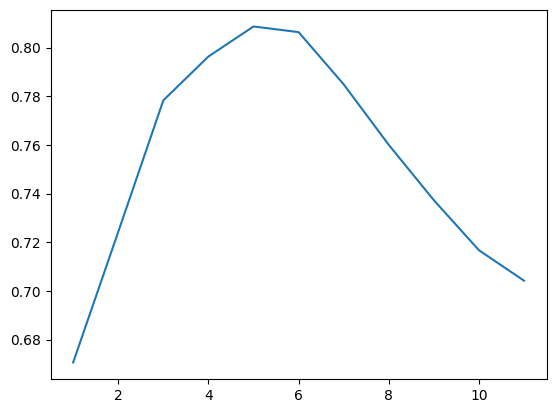

In [30]:
from matplotlib import pyplot as plt
print(plt.plot(final_model.depth,final_model.auc))

This depth model shows us that the depth of 5 is the optimum depth as we calculated earlier.

#15 Which variables appear to be contributing the most (variable importance) 

In [31]:
varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                           importance
num_voted_users              0.526925
budget                       0.122635
duration                     0.112611
genres                       0.075905
actor_2_facebook_likes       0.047320
gross                        0.032251
language                     0.027843
num_critic_for_reviews       0.015486
title_year                   0.011887
actor_3_facebook_likes       0.011324
cast_total_facebook_likes    0.008215
aspect_ratio                 0.006063
plot_keywords                0.001536
content_rating               0.000000
country                      0.000000
color                        0.000000
num_user_for_reviews         0.000000
facenumber_in_poster         0.000000
director_name                0.000000
actor_1_name                 0.000000
actor_1_facebook_likes       0.000000
actor_2_name                 0.000000
director_facebook_likes      0.000000
movie_facebook_likes         0.000000


Axes(0.125,0.11;0.775x0.77)


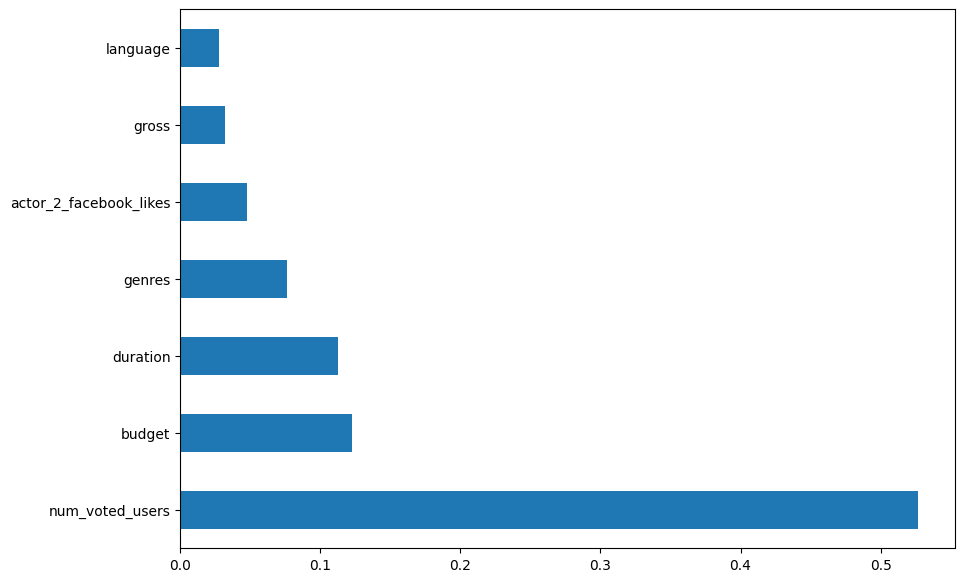

In [32]:
plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh'))

We see here that `num_voted_users_` is by far the variable with the highest importence, followed by `budget`, `duration`, and `genre`.

#16 Use the predict method on the test data and print out the results.

In [33]:
y_pred = model.predict(X_test)
print(y_pred)

[1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.

#17 How does the model perform on the test data?

In [35]:
from sklearn.metrics import classification_report
print(model.score(X_test, y_test))
print(classification_report(y_pred, y_test))

0.7912543728135932
              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63       101
         1.0       0.87      0.83      0.85       275

    accuracy                           0.79       376
   macro avg       0.73      0.75      0.74       376
weighted avg       0.80      0.79      0.79       376



The model appears to perform reasonably well on the test data. We have a good balance between precision and recall for 'not good' movies. However, there is room for improvement in the model's performance of identifying 'good' movies, which is what we are building the model for. It is still alright, but still room for improvement. The model is at least doing nearly two times better than randomly guessing.

#18 Print out the confusion matrix for the test data, what does it tell you about the model?

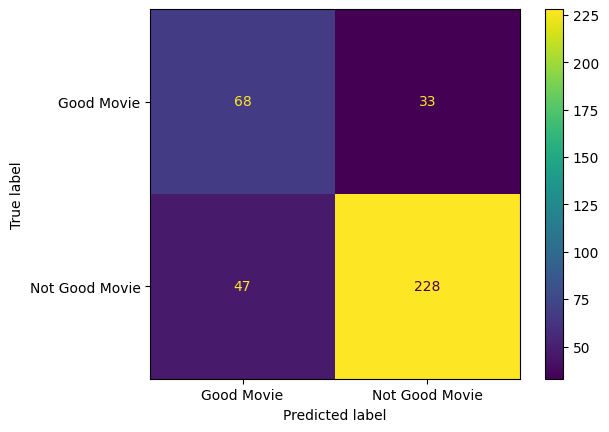

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

custom_threshold = 0.5
conf_matrix = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Good Movie','Not Good Movie'])
disp.plot()

The confusion matrix confirms that our model has a fairly decent accuracy (0.8125), but is doing much better at predicting 'not good' movies than it is at predicting 'good' movies which, again, is the goal of the model. 

#19 What are the top 3 movies based on the test set? Which variables are most important in predicting the top 3 movies?

In [39]:
top_3_indices = X_test.index[y_pred.argsort()[-3:][::-1]]

# Use these indices to retrieve the top 3 movies from the original dataset
top_3_movies = old_movie_metadata.iloc[top_3_indices]

print(top_3_movies[['movie_title', 'imdb_score']])
#again, using the feature importances we know the top 3 features are num_voted_users, budget, and duration

             movie_title  imdb_score
1076  Miss Congeniality          6.2
1085       Training Day          7.7
874        Stuck on You          5.8


#20 Summarize what you learned along the way and make recommendations on how this could be used moving forward, being careful not to over promise.

We have learned that even with a lot of data, sometimes getting a model to perform outstandingly is much more difficult than we previously thought. This model is okay at perdicting which movies will be 'good,' but need more tuning and feature engineering to reach its peak performance (without overfitting to our data). As for reccomendations, we say that this model can be used to predict which movies will be good, but does a much better job at predicting which movies won't be good, which can be almost as important. However, we would not reccomend using the model on its own in its current state. Perhaps using this predictive model in conjuncction with input from industry professionals would give the user a broader, more holistic view of whether an upcoming movie will end up 'good' or 'not good.' 